In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import sklearn.metrics as metric
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss
from sklearn.svm import LinearSVC
pd.set_option('display.max_columns', None)

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [3]:
data = pd.DataFrame(data, columns=['weather', 'stroll'])
data

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [4]:
stroll_with_rain=len(data[(data['weather']=="дождь") & (data['stroll']==True)])
stroll_with_rain

1

In [5]:
rain_event=len(data[data['weather'] == 'дождь'])
rain_event

3

In [6]:
chance_stroll = stroll_with_rain  / rain_event
print(chance_stroll)

0.3333333333333333


# Задание 2

In [7]:
data=pd.read_csv('../data/smoke_detector_task.csv')
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,No
62626,62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,No
62627,62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,No
62628,62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,No


# Data Preprocessing :

In [8]:
data.isnull().sum()

Unnamed: 0          0
UTC                 0
Temperature[C]    146
Humidity[%]       247
TVOC[ppb]         621
eCO2[ppm]         325
Raw H2            111
Raw Ethanol         0
Pressure[hPa]      27
PM1.0               0
PM2.5             317
NC0.5               0
NC1.0             252
NC2.5               0
CNT                 0
Fire Alarm          0
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data=data.drop(['Unnamed: 0'],axis=1)

Проверка на тип данных :

In [11]:
dict1 = {'Yes': '1', 'No': '0'}

data['Fire Alarm'] = data['Fire Alarm'].map(dict1)
data['Fire Alarm']=data['Fire Alarm'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60603 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             60603 non-null  int64  
 1   Temperature[C]  60603 non-null  float64
 2   Humidity[%]     60603 non-null  float64
 3   TVOC[ppb]       60603 non-null  float64
 4   eCO2[ppm]       60603 non-null  float64
 5   Raw H2          60603 non-null  float64
 6   Raw Ethanol     60603 non-null  int64  
 7   Pressure[hPa]   60603 non-null  float64
 8   PM1.0           60603 non-null  float64
 9   PM2.5           60603 non-null  float64
 10  NC0.5           60603 non-null  float64
 11  NC1.0           60603 non-null  float64
 12  NC2.5           60603 non-null  float64
 13  CNT             60603 non-null  int64  
 14  Fire Alarm      60603 non-null  int32  
dtypes: float64(11), int32(1), int64(3)
memory usage: 7.2 MB


Проверка на явные дубликаты:

In [13]:
data.duplicated().sum()

0

Получим корреляцию и математическое описание данных:

In [14]:
data

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [15]:
data.corr()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
UTC,1.000000,-0.164230,-0.392236,0.178306,0.130163,-0.148657,0.169576,-0.434344,0.121569,0.104042,0.128365,0.102462,0.082376,-0.252168,-0.389898
Temperature[C],-0.164230,1.000000,-0.244589,0.084804,0.081588,-0.137708,-0.039380,-0.251857,0.038443,0.032992,0.040484,0.032499,0.026212,-0.089345,-0.164046
Humidity[%],-0.392236,-0.244589,1.000000,-0.488303,-0.368341,0.245425,0.067329,0.694897,-0.235102,-0.177206,-0.276258,-0.172541,-0.116885,0.252334,0.399826
TVOC[ppb],0.178306,0.084804,-0.488303,1.000000,0.602436,-0.650720,-0.672667,-0.219144,0.597912,0.477422,0.671355,0.467352,0.344548,-0.057517,-0.214574
eCO2[ppm],0.130163,0.081588,-0.368341,0.602436,1.000000,-0.682235,-0.504386,-0.327354,0.662797,0.569781,0.696879,0.561338,0.453611,-0.106881,-0.095779
Raw H2,-0.148657,-0.137708,0.245425,-0.650720,-0.682235,1.000000,0.630269,0.302642,-0.530515,-0.430447,-0.587693,-0.421972,-0.317803,-0.031005,0.106105
Raw Ethanol,0.169576,-0.039380,0.067329,-0.672667,-0.504386,0.630269,1.000000,-0.077535,-0.480983,-0.393109,-0.529495,-0.385616,-0.293169,-0.512711,-0.341539
Pressure[hPa],-0.434344,-0.251857,0.694897,-0.219144,-0.327354,0.302642,-0.077535,1.000000,-0.257080,-0.241674,-0.246171,-0.239785,-0.212481,0.187208,0.249477
PM1.0,0.121569,0.038443,-0.235102,0.597912,0.662797,-0.530515,-0.480983,-0.257080,1.000000,0.955775,0.939233,0.949483,0.854273,-0.093359,-0.110613
PM2.5,0.104042,0.032992,-0.177206,0.477422,0.569781,-0.430447,-0.393109,-0.241674,0.955775,1.000000,0.796738,0.999786,0.969372,-0.083613,-0.084826


In [16]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.060300e+04,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000
mean,1.654792e+09,15.969422,48.530699,1940.224296,670.565731,12942.483507,19754.829381,938.626170,100.456575,184.535487,489.985977,203.690792,80.250339,10504.482121,0.714371
std,1.101285e+05,14.364021,8.885096,7803.365405,1910.834428,272.409853,609.240337,1.334196,922.971678,1980.884024,4263.976415,2220.198260,1087.865967,7594.776939,0.451717
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.980000,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.330000,8.795000,1.381500,0.033000,3622.000000,0.000000
50%,1.654762e+09,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9323.000000,1.000000
75%,1.654778e+09,25.410000,53.240000,1189.000000,438.000000,13109.000000,20079.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,17149.500000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


# Model training :

In [17]:
X = data.drop(['Fire Alarm'], axis=1)
y= data['Fire Alarm']
X

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 60603, dtype: int32

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

Text(0, 0.5, 'Количество строк')

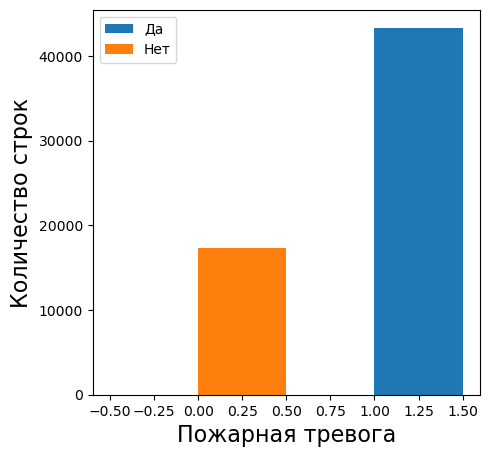

In [20]:
bins = 2
plt.figure(figsize = (5,5))

plt.hist(y.loc[y == 1], bins, label = 'Да')

plt.hist(y.loc[y == 0], bins, label = 'Нет')


plt.legend()

plt.xlabel('Пожарная тревога', fontsize = 16)
plt.ylabel('Количество строк', fontsize = 16)

In [21]:
nm = NearMiss()
X_train, y_train  = nm.fit_resample(X_train,y_train )

Балансировка классов:

Text(0, 0.5, 'Количество строк')

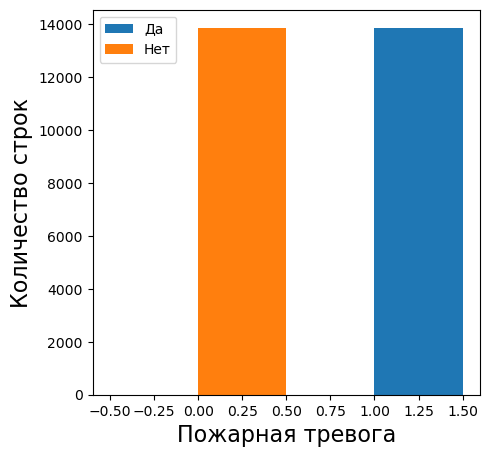

In [22]:
bins = 2
plt.figure(figsize = (5,5))

plt.hist(y_train.loc[y_train == 1], bins, label = 'Да')

plt.hist(y_train.loc[y_train == 0], bins, label = 'Нет')


plt.legend()

plt.xlabel('Пожарная тревога', fontsize = 16)
plt.ylabel('Количество строк', fontsize = 16)

## KNN:

In [23]:
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ]
)
pipe.fit(X_train, y_train)
y_knn_pred = pipe.predict(X_test)

In [24]:
confusion_matrix(y_test, y_knn_pred)

array([[3460,    2],
       [   7, 8652]], dtype=int64)

In [25]:
print(f"Accuracy: {accuracy_score(y_test, y_knn_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_knn_pred)}")
print(f"F1 score: {f1_score(y_test, y_knn_pred)}")
print(f"Recall score: {recall_score(y_test, y_knn_pred)}")
print(f"Precision score: {precision_score(y_test, y_knn_pred)}")

Accuracy: 0.9992574870060226
ROC AUC score: 0.9993069459058204
F1 score: 0.9994801594177786
Recall score: 0.9991915925626516
Precision score: 0.9997688929974579


In [26]:
confusion_matrix(y_test, y_knn_pred)

array([[3460,    2],
       [   7, 8652]], dtype=int64)

In [27]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3462
           1       1.00      1.00      1.00      8659

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121



## Naive Bayes :

In [28]:
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ('model', GaussianNB()),
    ]
)
pipe.fit(X_train, y_train)
y_knn_pred = pipe.predict(X_test)

In [29]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred)}")

Accuracy: 0.8187443280257405
ROC AUC score: 0.6911926788455512
F1 score: 0.8862777576479114
Recall score: 0.9886822958771221
Precision score: 0.8030956848030019


In [30]:
confusion_matrix(y_test, y_pred)

array([[1363, 2099],
       [  98, 8561]], dtype=int64)

## Logistic Regression

In [31]:
pipe = Pipeline(
    [('minmaxscaler', MinMaxScaler()), 
     ('model', LogisticRegression()) 
    ]
)
pipe.fit(X_train, y_train)

y_lr_pred=pipe.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_lr_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_lr_pred)}")
print(f"F1 score: {f1_score(y_test, y_lr_pred)}")
print(f"Recall score: {recall_score(y_test, y_lr_pred)}")
print(f"Precision score: {precision_score(y_test, y_lr_pred)}")

Accuracy: 0.9685669499216236
ROC AUC score: 0.9676846349013315
F1 score: 0.9778165938864627
Recall score: 0.9697424644878161
Precision score: 0.9860263034288398


C:\Users\djego\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
confusion_matrix(y_test, y_lr_pred)

array([[3343,  119],
       [ 262, 8397]], dtype=int64)

## SVM

In [33]:
pipe = Pipeline(
    [('minmaxscaler', MinMaxScaler()), ('model', LinearSVC(max_iter=100)) 
    ]
)
pipe.fit(X_train, y_train)

y_svml_pred=pipe.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_svml_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_svml_pred)}")
print(f"F1 score: {f1_score(y_test, y_svml_pred)}")
print(f"Recall score: {recall_score(y_test, y_svml_pred)}")
print(f"Precision score: {precision_score(y_test, y_svml_pred)}")

C:\Users\djego\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.9834997112449468
ROC AUC score: 0.9828170053644975
F1 score: 0.988404452690167
Recall score: 0.9844092851368519
Precision score: 0.9924321806962394


C:\Users\djego\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
confusion_matrix(y_test, y_lr_pred)

array([[3343,  119],
       [ 262, 8397]], dtype=int64)

# Model classifiers

In [35]:
classifiers = {
   
    'KNN classifier': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    'Naive Bayes': GaussianNB(),
    'Logistic regression': LogisticRegression(random_state=0),
    "SVC":  LinearSVC(max_iter=10000)
    
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):

    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for KNN classifier: 100.0% 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3462
           1       1.00      1.00      1.00      8659

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121

Accuracy (train) for Naive Bayes: 81.9% 
              precision    recall  f1-score   support

           0       0.93      0.39      0.55      3462
           1       0.80      0.99      0.89      8659

    accuracy                           0.82     12121
   macro avg       0.87      0.69      0.72     12121
weighted avg       0.84      0.82      0.79     12121

Accuracy (train) for Logistic regression: 28.6% 
              precision    recall  f1-score   support

           0       0.29      1.00      0.44      3462
           1       0.00      0.00      0.00      8659

    accuracy                           0.29    

C:\Users\djego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\djego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\djego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\djego\anaconda3\Lib\site-packages\sklearn\svm\

Accuracy (train) for SVC: 28.6% 
              precision    recall  f1-score   support

           0       0.29      1.00      0.44      3462
           1       0.00      0.00      0.00      8659

    accuracy                           0.29     12121
   macro avg       0.14      0.50      0.22     12121
weighted avg       0.08      0.29      0.13     12121



C:\Users\djego\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\djego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\djego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\djego\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sam

# Задание 3

In [36]:
def my_metrics(y_test, y_pred):
    y_test = y_test.reset_index(drop=True)
    y_pred = pd.Series(y_pred).reset_index(drop=True)
    compared = y_test == y_pred
    compared = compared.reset_index(drop=True)
    y_test = y_test.astype(bool).reset_index(drop=True)
    
    TP = (y_test & compared).sum()
    TN = (~y_test & compared).sum()
    FN = (y_test & ~compared).sum()
    FP = (~y_test & ~compared).sum()
    
    accuracy = (TP + TN)/(y_test.count())
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = (2 * precision * recall) / (precision + recall)
    
    print('F1: ', f1)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)

In [37]:
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ]
)
pipe.fit(X_train, y_train)
y_knn_pred = pipe.predict(X_test)
my_metrics(y_test, y_knn_pred)

F1:  0.9994801594177786
Accuracy:  0.9992574870060226
Precision:  0.9997688929974579
Recall:  0.9991915925626516


In [103]:
from statistics import mode
from math import sqrt

class myknn:
    def __init__(self, k=3,p=1,metric="minkowski"):
        self.k = k
        self.p = p
        self.metric=metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y.reset_index(drop=True)

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
  
    def distance(self,data1,data2):
        distance = 0
        if(self.metric=="minkowski"):
            for i in range (len(data1) - 1):
                distance +=np.abs(data1[i] - data2[i])**self.p
            return sqrt(distance)
        elif(self.metric=="euclidean"):
            for i in range (len(data1) - 1):
                distance +=(data1[i] - data2[i])**2
            return sqrt(distance)
        elif(self.metric=="manhattan"):
            for i in range (len(data1) - 1):
                distance +=np.abs(data1[i] - data2[i])
            return sqrt(distance)
            
    
    def _predict(self, x):
        distances = [myknn.distance(self,x, x_train) for x_train in self.X_train]
        k_neighbors_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]
        most_common = mode(k_neighbor_labels)
        return most_common

In [104]:
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X.head(5000), y.head(5000), test_size=0.2)
user_knn = Pipeline([("scaler", MinMaxScaler()),
                 ("model", myknn(k=5,p=1,metric="manhattan"))])
user_knn.fit(Xh_train.values, yh_train)
user_knn_pred = user_knn.predict(Xh_test.values)

In [105]:
print(classification_report(yh_test, user_knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       1.00      1.00      1.00       402

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
confusion_matrix(y_test.head(1000), user_knn_pred)